In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
# Load the dataset
df = pd.read_csv('/content/spam_classification_dataset.csv')

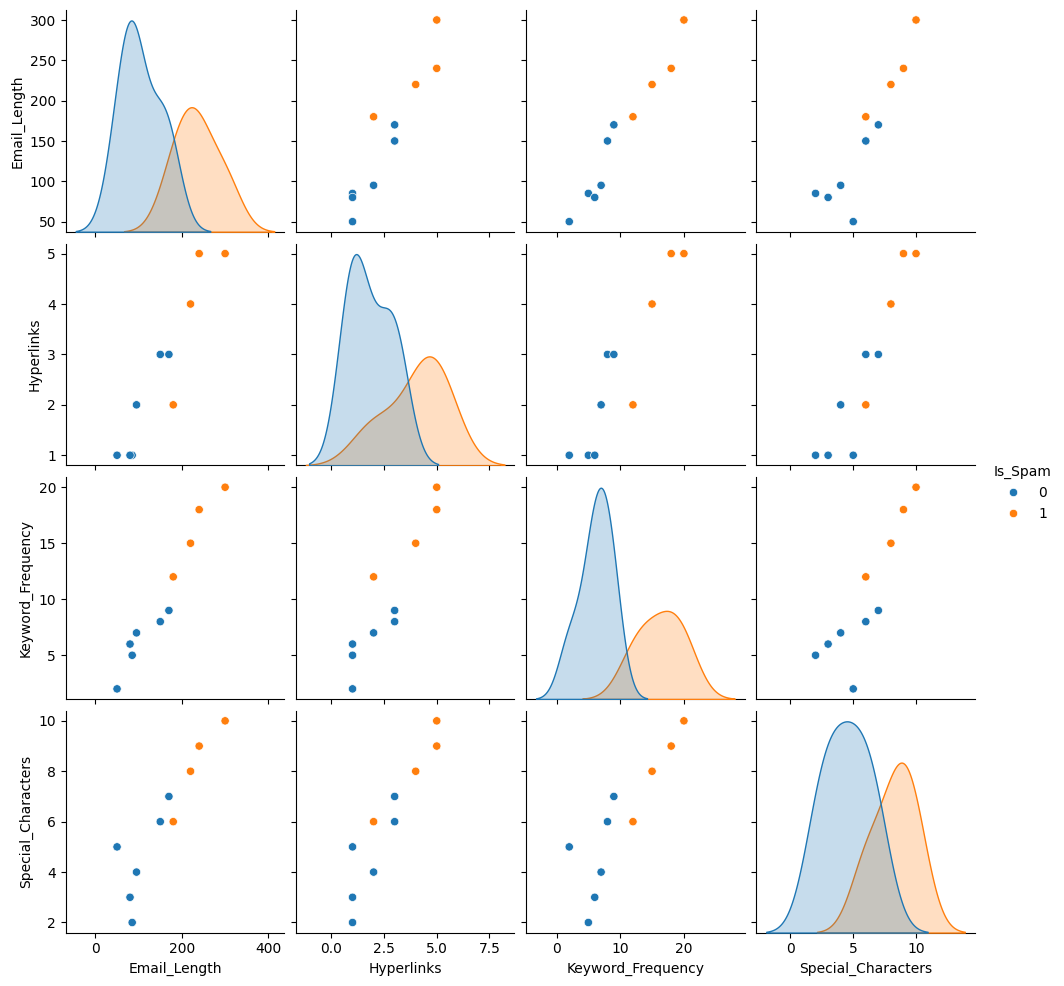

In [ ]:
# Visualize relationships between features and the target class
sns.pairplot(df, hue='Is_Spam')
plt.show()


In [ ]:
# Split the data into features (X) and target (y)
X = df.drop('Is_Spam', axis=1)
y = df['Is_Spam']


In [ ]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features to a standard range
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Train an SVM model with a linear kernel
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = svm_model.predict(X_test_scaled)


In [ ]:
# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 100.00%


In [ ]:
# Visualization: Using only the first two features
X_2D = X.iloc[:, :2]
X_train_2D, X_test_2D, y_train_2D, y_test_2D = train_test_split(X_2D, y, test_size=0.2, random_state=42)



In [ ]:
# Scaling the 2D features
X_train_2D_scaled = scaler.fit_transform(X_train_2D)
X_test_2D_scaled = scaler.transform(X_test_2D)



In [ ]:
# Train a new linear SVM model on the 2D feature space
svm_model_2D = SVC(kernel='linear', random_state=42)
svm_model_2D.fit(X_train_2D_scaled, y_train_2D)

SVC(kernel='linear', random_state=42)

In [ ]:
# Create a mesh grid for plotting the decision boundary
x_min, x_max = X_train_2D_scaled[:, 0].min() - 1, X_train_2D_scaled[:, 0].max() + 1
y_min, y_max = X_train_2D_scaled[:, 1].min() - 1, X_train_2D_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

In [ ]:
# Predict the class for each point in the mesh grid
Z = svm_model_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

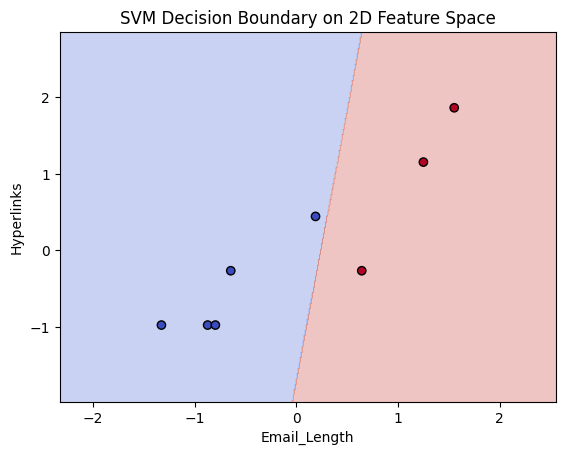

In [ ]:
# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train_2D_scaled[:, 0], X_train_2D_scaled[:, 1], c=y_train_2D, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Email_Length')
plt.ylabel('Hyperlinks')
plt.title('SVM Decision Boundary on 2D Feature Space')
plt.show()

#CONCLUSION:

In this project, we implemented an SVM model for classifying spam emails using the `spam_classification_dataset.csv`. Initial visualizations revealed important relationships between features and the target class, while the model's accuracy significantly improved after applying feature scaling, demonstrating the sensitivity of SVMs to feature magnitudes. By visualizing the decision boundaries, we illustrated how the SVM effectively separates "Spam" from "Not Spam," with enhanced separation achieved through scaling. Overall, this project highlights the crucial role of data preprocessing in improving classification performance in spam detection tasks, suggesting that future work could explore additional features and kernel variations for further enhancements.